# Exercise 3

## a.
We opted to put our previous knowledge from python to use, has it was an option, and used jupyter instead of R.

## b.
Run from the terminal, inside folder U2-app    
    -> node index.js start

## c. d. e. 
- Use InfluxDBr2 to load data
- Apply windowing -> windowFr
- Join all timeseries into a single dataframe -> movementFr

In [5]:
import pandas as pd
from influxdb import InfluxDBClient
import os

In [6]:
cli = InfluxDBClient(database='training', ssl=False, verify_ssl=False)


In [7]:
def load_db():
    cli = InfluxDBClient(database='training', ssl=False, verify_ssl=False)
    movementFr = pd.DataFrame(cli.query('select * from empty')['empty'])
    movementFr = movementFr.set_index(['time'])
    movementFr.index = pd.to_datetime(movementFr.index)
    return movementFr

def window(movementFrame, aggregates=['min', 'max', 'median', 'std']):
    aggregatedFr = movementFrame.drop(['label', 'subject'], axis=1).groupby(pd.Grouper(freq='1000ms')).aggregate(aggregates).dropna()
    aggregatedStrings = movementFrame[['label', 'subject']].groupby(pd.Grouper(freq='1000ms')).first() #window of 1000ms = 1s
    aggregatedFr.columns = [col[0]+"_"+col[1] for col in aggregatedFr.columns]
    aggregatedFr = aggregatedFr.join(aggregatedStrings)
    return aggregatedFr

In [8]:
# load dataset from InfluxDB
movementFr = load_db()
# apply windowing
windowFr = window(movementFrame=movementFr)

In [9]:
movementFr.head()

,alpha,alphaG,beta,betaG,count,gamma,gammaG,label,lux,subject
time,,,,,,,,,,
2019-10-03 12:45:02.151000+00:00,-458,814,-171,4223,2,264,9050,testing,24000,Plz
2019-10-03 12:45:02.217000+00:00,29,1072,-28,4252,3,847,9653,testing,24000,Plz
2019-10-03 12:45:02.292000+00:00,209,1095,77,4258,4,-410,8449,testing,24000,Plz
2019-10-03 12:45:02.355000+00:00,29,874,-70,4118,5,-34,8835,testing,24000,Plz
2019-10-03 12:45:02.401000+00:00,-173,668,-209,3985,6,300,9142,testing,24000,Plz


In [29]:
windowFr.head()

,alpha_min,alpha_max,alpha_median,alpha_std,alphaG_min,alphaG_max,alphaG_median,alphaG_std,beta_min,beta_max,...,gammaG_min,gammaG_max,gammaG_median,gammaG_std,lux_min,lux_max,lux_median,lux_std,label,subject
time,,,,,,,,,,,,,,,,,,,,,
2019-10-02 11:27:33+00:00,3632.0,6643.0,4685.0,1283.491128,6400.0,13121.0,8035.0,2571.444517,-1976.0,124.0,...,-2528.0,5146.0,1947.0,2976.416046,15666.0,22000.0,20000.0,1915.086322,sitting,Enes
2019-10-02 11:27:34+00:00,-5608.0,2909.0,-1406.0,2209.106239,3650.0,10604.0,7315.0,1903.687849,-7044.0,4782.0,...,-9992.0,-490.0,-5589.0,2333.917672,0.0,22000.0,13000.0,8669.028018,sitting,Enes
2019-10-02 11:27:35+00:00,-5616.0,-433.0,-3931.5,1670.491396,2209.0,3739.0,3195.5,385.667241,-203.0,4128.0,...,-9129.0,-8355.0,-8885.5,177.769395,0.0,0.0,0.0,0.000000,sitting,Enes
2019-10-02 11:27:36+00:00,-999.0,672.0,119.5,392.131221,2203.0,3901.0,3345.5,451.056246,-1244.0,410.0,...,-9616.0,-8382.0,-8904.0,281.100675,0.0,0.0,0.0,0.000000,sitting,Enes
2019-10-02 11:27:37+00:00,-319.0,494.0,32.0,187.219151,2467.0,3420.0,3008.0,233.135713,-601.0,604.0,...,-10339.0,-8557.0,-9207.5,375.651210,0.0,0.0,0.0,0.000000,sitting,Enes


In [30]:
Folder_raw = os.path.join('data', 'Frames_test.csv')
Folder_window = os.path.join('data', 'windowFrames_test.csv')
movementFr.to_csv(Folder_raw)
windowFr.to_csv(Folder_window)

## f. Visualize the feature space

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import os

In [9]:
# load data from csv files
Folder_raw = os.path.join('data', 'Frames.csv')
Folder_window = os.path.join('data', 'windowFrames.csv')
movementFrame = pd.read_csv(Folder_raw)
windowFrame = pd.read_csv(Folder_window)

movementFrame = movementFrame.set_index(['time'])
movementFrame.index = pd.to_datetime(movementFrame.index)

windowFrame = windowFrame.set_index(['time'])
windowFrame.index = pd.to_datetime(windowFrame.index)

### - Check if data is evenly distributed

In [11]:
# Check if data is evenly distributed
hist = np.array([0,0,0])
count = 0
for i in range(len(movementFrame)):
    current_count = movementFrame.iloc[i]['count']
    if current_count <= count:
        if movementFrame.iloc[i-1]['label'] == 'sitting':
            hist[0] += count
        elif movementFrame.iloc[i-1]['label'] == 'walking':
            hist[1] += count
        else : # movementFrame.iloc[i-1].label == 'standing'
            hist[2] += count
    count = current_count
print('From all frames:\nsitting: ', hist[0], '\nwalking: ', hist[1], '\nstanding: ', hist[2])

From all frames:
sitting:  7751 
walking:  6192 
standing:  6540


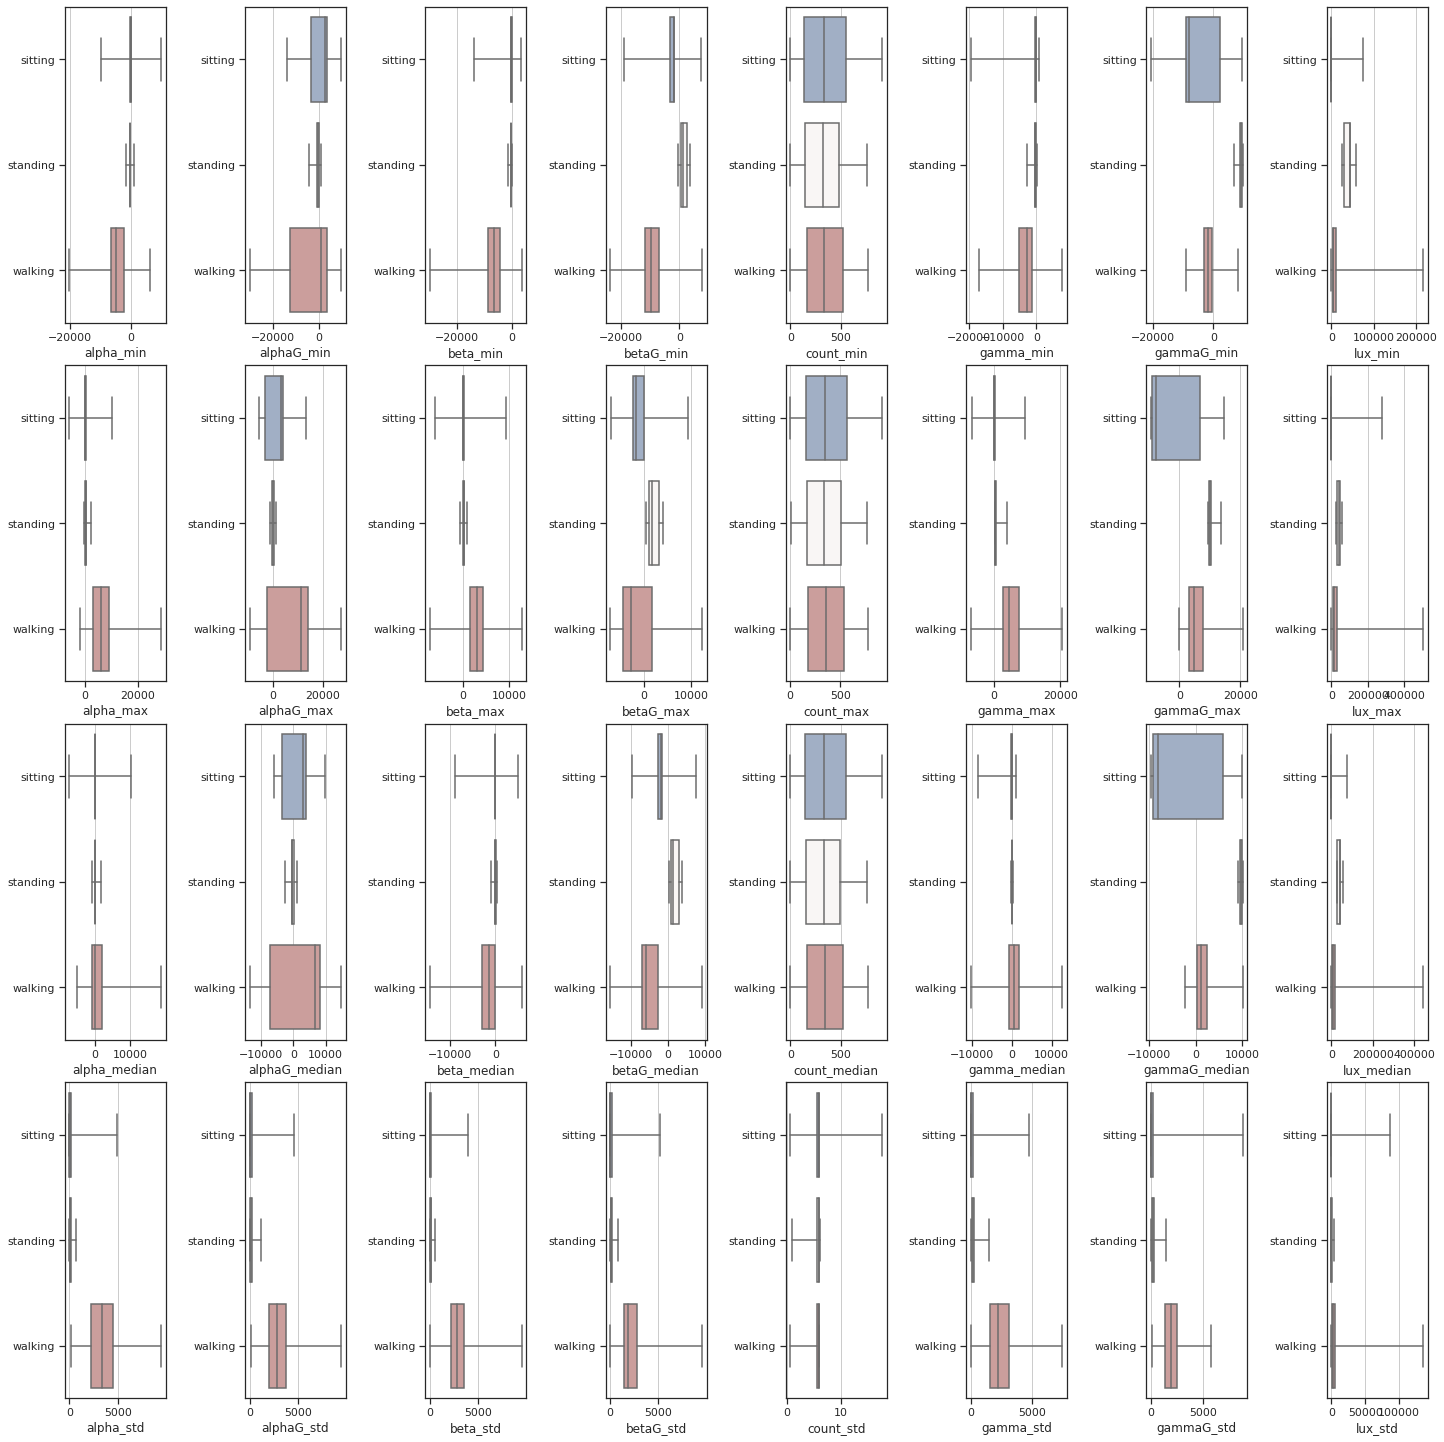

In [12]:
sns.set(style="ticks")
windowColumns = windowFrame.columns[:-2] # only numerical columns (without label and subject)
aggregates=['min', 'max', 'median', 'std']
numAggregates = len(aggregates)
f, ax = plt.subplots(numAggregates,int(len(windowColumns)/numAggregates),figsize=(20, 20))
for idx, column in enumerate(windowColumns):
    this_ax = ax[idx % numAggregates,int(idx/numAggregates)]
    
    # Plot the orbital period with horizontal boxes
    sns.boxplot(x=column, y="label", data=windowFrame,
                whis="range", palette="vlag", ax=this_ax)
    
    # Tweak the visual presentation
    this_ax.xaxis.grid(True)
    this_ax.set(ylabel="")
plt.tight_layout(0.5)

### Reduce windowed features

In [13]:
#columns = [column for column in aggregatedFrame.columns if 'gamma' in column or 's_' in column]
columns = ['betaG_min',
           'gammaG_min',
           'lux_min',
           'alpha_max',
           'betaG_median',
           'label']
reducedWindowFrame = windowFrame[columns]
reducedWindowFrame.head()

,betaG_min,gammaG_min,lux_min,alpha_max,betaG_median,label
time,,,,,,
2019-10-02 11:27:33+00:00,-844.0,-2528.0,15666.0,6643.0,160.0,sitting
2019-10-02 11:27:34+00:00,-9762.0,-9992.0,0.0,2909.0,-3635.0,sitting
2019-10-02 11:27:35+00:00,-5673.0,-9129.0,0.0,-433.0,-2812.0,sitting
2019-10-02 11:27:36+00:00,-3959.0,-9616.0,0.0,672.0,-2775.5,sitting
2019-10-02 11:27:37+00:00,-2050.0,-10339.0,0.0,494.0,-1664.5,sitting


### Check pairwise features relationships 

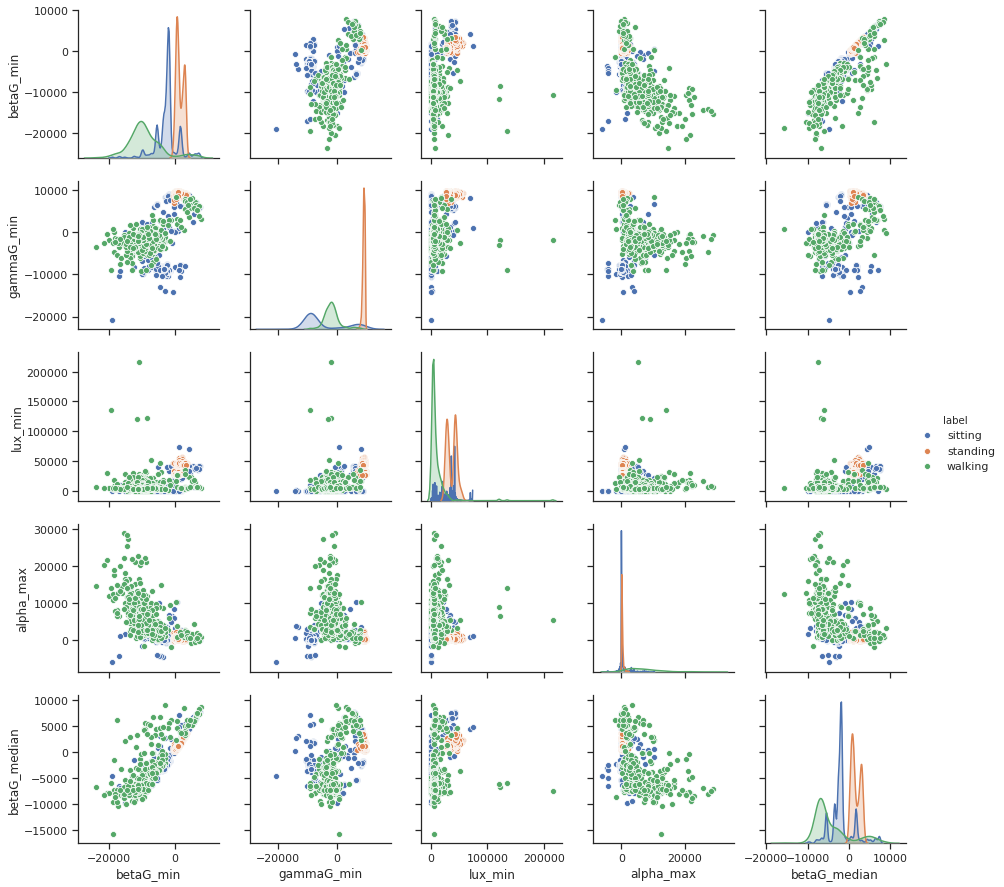

In [14]:
sns.pairplot(reducedWindowFrame, hue="label");

### Check how PCA performs with our reduced data
- Convert a set of observations of possibly correlated variables into a set of values of linearly uncorrelated variables

/home/sazinhal/anaconda3/envs/kss/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/home/sazinhal/anaconda3/envs/kss/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


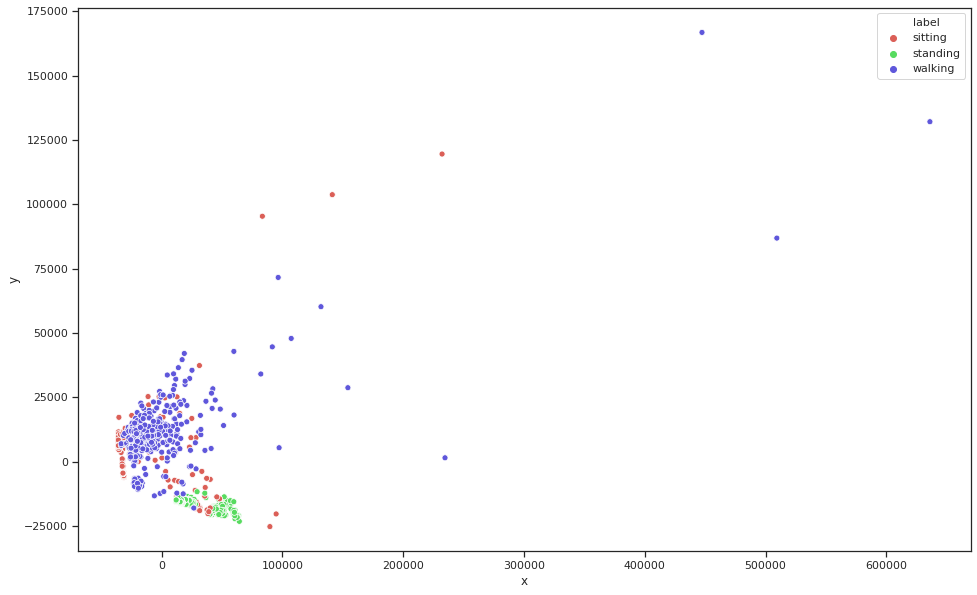

In [15]:
X = windowFrame.drop(['label','subject'], axis=1).to_numpy()
decomposition=PCA(n_components=2, svd_solver='arpack')
X_embedded = decomposition.fit_transform(X)
pca = windowFrame[['label']]
pca['x'] = X_embedded[:,0]
pca['y'] = X_embedded[:,1]

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="x", y="y",
    hue="label",
    palette=sns.color_palette("hls", 3),
    data=pca,
    legend="full"
);

In [16]:
decomposition.get_params()

{'copy': True,
 'iterated_power': 'auto',
 'n_components': 2,
 'random_state': None,
 'svd_solver': 'arpack',
 'tol': 0.0,
 'whiten': False}

**Results:**
PCA didn't show clear results for discrimination of the data.  

### Check how TSNE performs (t-distributed Stochastic Neighbor Embedding)

/home/sazinhal/anaconda3/envs/kss/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/home/sazinhal/anaconda3/envs/kss/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


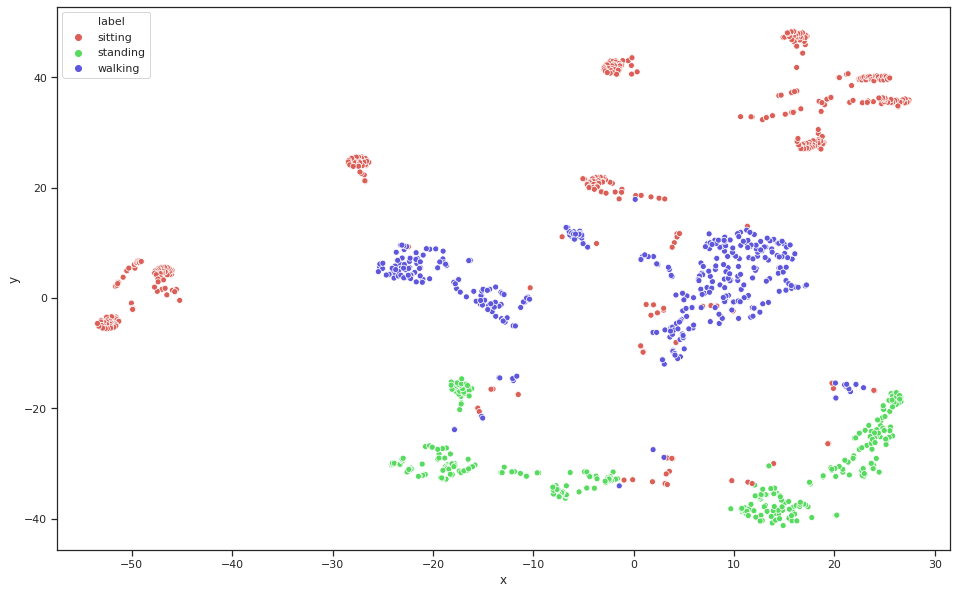

In [17]:
X = windowFrame.drop(['label','subject'], axis=1).to_numpy()
manifold=TSNE(n_components=2)
X_embedded = manifold.fit_transform(X)
tsne = windowFrame[['label']]
tsne['x'] = X_embedded[:,0]
tsne['y'] = X_embedded[:,1]

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="x", y="y",
    hue="label",
    palette=sns.color_palette("hls", 3),
    data=tsne,
    legend="full"
);

In [18]:
manifold.get_params()

{'angle': 0.5,
 'early_exaggeration': 12.0,
 'init': 'random',
 'learning_rate': 200.0,
 'method': 'barnes_hut',
 'metric': 'euclidean',
 'min_grad_norm': 1e-07,
 'n_components': 2,
 'n_iter': 1000,
 'n_iter_without_progress': 300,
 'perplexity': 30.0,
 'random_state': None,
 'verbose': 0}

**Results:** 
TSNE performed better than PCA!